<a href="https://colab.research.google.com/github/max-moore/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS18_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
sample_small = df.sample(20, random_state=42)
sample_big = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
print(sample_small['ConvertedSalary'].mean())
print(sample_big['ConvertedSalary'].mean())

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the larger sample more.  The larger your sample, the smaller your confidence interval.  A non-technical audience might understand the idea of larger samples being more trustworthy, but probably wouldn't understand the technicals of why that is.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

I think with both sample means next to each other you can at least observe that there is a meaningful amount of variance within the population - which indicates a relevant margin of error.

Just having the mean on its own is hard to contextualize without any other data.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Use confidence intervals and confidence levels!  Telling someone that there is a 54-58% chance of a Democrat winning the presidential election with a 95% confidence level is more accurate than telling them there's a 56% chance of a Democrat winning.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
def confidence_interval(sample, confidence_level=.95):
  
  # Turn this into a numpy array for contingency
  data = np.array(sample)
  
  # Sample Standard Deviation (ddof=1) with numpy to get sample metrics
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)
  
  # Look up the t statistic that corresponds to our sample size *and* confidence level
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n-1)
  # Standard Error
  std_err = (s / np.sqrt(n))
  # Margin of Error
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [ ]:
CI1 = confidence_interval(sample_small['ConvertedSalary'])

print(CI1)

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)


In [ ]:
CI2 = confidence_interval(sample_big['ConvertedSalary'])

print(CI2)

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distribution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
print(sample_small['ConvertedSalary'].mean())

print(CI1[3])

55752.2
19947.096903744638


In [ ]:
print(sample_big['ConvertedSalary'].mean())

print(CI2[3])

68551.255
7958.196195520917


The margin of error tells us how much our results could differ from the population mean.

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

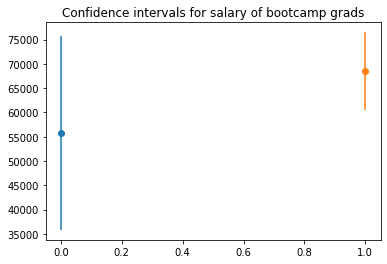

In [ ]:
plt.errorbar(0, CI1[1], yerr=CI1[3], fmt='o')
plt.errorbar(1, CI2[1], yerr=CI2[3], fmt='o')
plt.title('Confidence intervals for salary of bootcamp grads')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

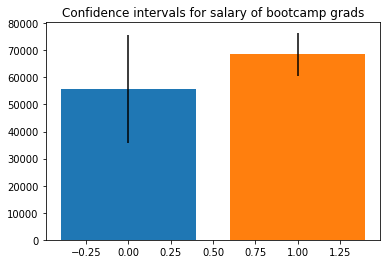

In [ ]:
plt.bar(0, height=CI1[1], yerr=CI1[3])
plt.bar(1, height=CI2[1], yerr=CI2[3])
plt.title('Confidence intervals for salary of bootcamp grads')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
CI3 = confidence_interval(df['ConvertedSalary'])

print(CI3)

# That margin of error is much smaller than what the samples returned.
# Much more precise.

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)


**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is how close the values are to each other, while accuracy is how close the values are to one specific value (the population mean, for example).

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% level of confidence means that 95% of the confidence intervals calculated from these random samples will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.